In [22]:
import os
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# mp3-wav
# https://www.online-convert.com/result#j=76596c9f-fa8e-48b3-82ea-5401a844608a

# mp4-mp3
# https://cloudconvert.com/mp4-to-mp3

In [163]:
genre = 'Gospel'
dire =os.getcwd()+'/'+genre
lise = dire+'//*.wav' # change to the correct file extension (.tif,.jpeg etc.)
listofnames = glob.glob(lise)
listofnames

['/Users/harrywang/Library/CloudStorage/OneDrive-Personal/UNC/2022-2023-2/MUSC 148/Project/Gospel/takemyhand.wav']

In [164]:
from scipy.io import wavfile
fname = listofnames[0]
samplerate, data = wavfile.read(fname)

In [165]:
samplerate
data.shape
tim = np.arange(data.shape[0])/samplerate
tim
leng = data.shape[0]/samplerate
leng

303.85632653061225

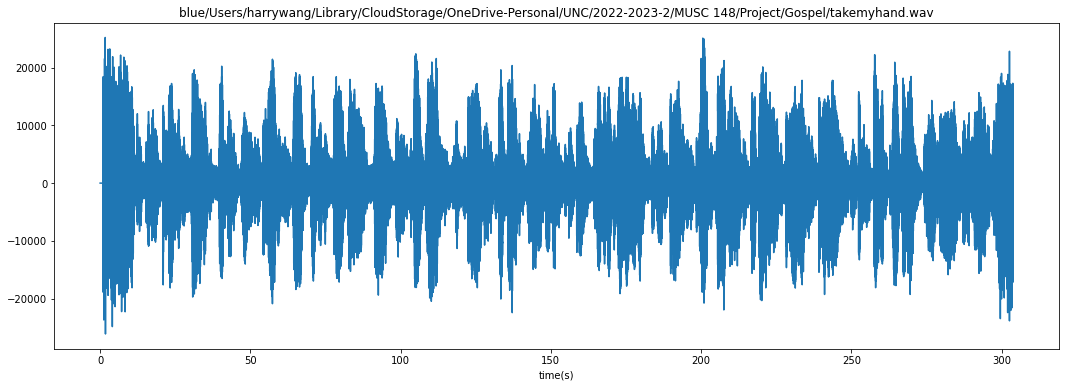

In [166]:
plt.figure(figsize=(18,6))
plt.plot(tim,data[:,0])
plt.title('blue'+fname)
plt.xlabel('time(s)')
plt.show()

/Applications/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show(close=None, block=None)>

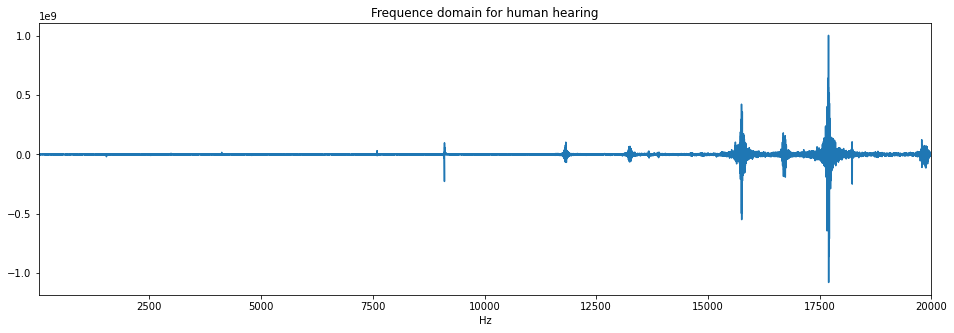

In [169]:
from scipy.fft import fft, ifft
frequency_domin = fft(data[:,0])
plt.figure(figsize=(16, 5))
plt.xlim([20, 20000])
plt.plot(frequency_domin)
plt.title('Frequence domain for human hearing')
plt.xlabel('Hz')
plt.show()

In [170]:
# from https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html
# https://librosa.org/doc/main/auto_examples/plot_chroma.html
import librosa
x , sr = librosa.load(fname)

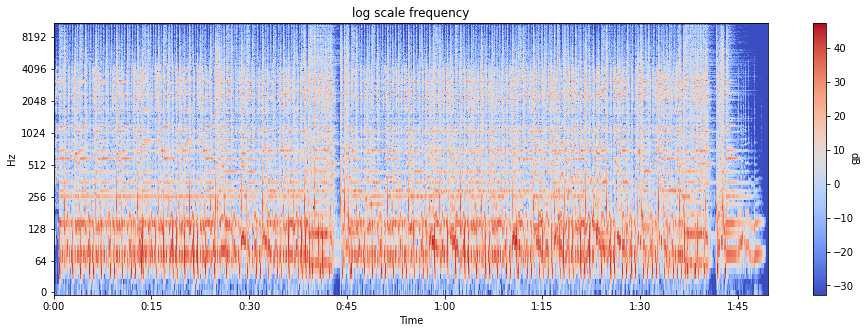

In [171]:
plt.figure(figsize=(16, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
colbar = plt.colorbar()
colbar.set_label('dB', rotation=270)
plt.title('log scale frequency')
plt.show()

/var/folders/jh/cvswdb3x5553hznz63gs43040000gn/T/ipykernel_69634/1399030334.py:5: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(img2)


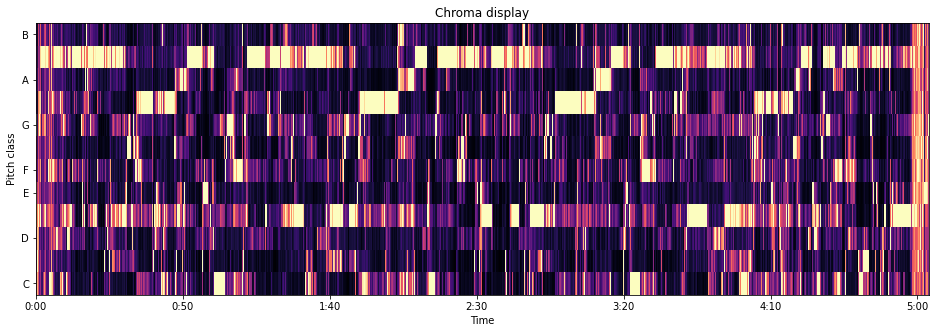

In [173]:
plt.figure(figsize=(16, 5))
chroma_orig = librosa.feature.chroma_cqt(y=x, sr=sr)
idx = tuple([slice(None), slice(*list(librosa.time_to_frames([0,leng])))])
img2 = librosa.display.specshow(chroma_orig[idx], y_axis='chroma', x_axis='time')
fig.colorbar(img2)
#plt.ylabel('Default chroma')
plt.title('Chroma display')
plt.show()

In [129]:
# emotion
# pip install NRCLex
# pip install text2emotion
from nrclex import NRCLex
import text2emotion as te
from nltk.sentiment import SentimentIntensityAnalyzer

In [128]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [174]:
direl =os.getcwd()+'/Lyrics'
lisel = direl+'//*.txt' # change to the correct file extension (.tif,.jpeg etc.)
lnames = glob.glob(lisel)
tt=lnames[1]
with open(tt, 'r') as file:
    lyrics = file.read().replace('\n', '. ')
lyrics

"Precious Lord, take my hand. Lead me on, let me stand. I'm tired, I'm weak, I'm lone. Through the storm, through the night. Lead me on to the light. Take my hand precious Lord, lead me home. . When my way grows drear precious Lord linger near. When my light is almost gone. Hear my cry, hear my call. Hold my hand lest I fall. Take my hand precious Lord, lead me home. . When the darkness appears and the night draws near. And the day is past and gone. At the river I stand. Guide my feet, hold my hand. Take my hand precious Lord, lead me home. . Precious Lord, take my hand. Lead me on, let me stand. I'm tired, I'm weak, I'm lone. Through the storm, through the night. Lead me on to the light. Take my hand precious Lord, lead me home"

In [178]:
sia = SentimentIntensityAnalyzer()
xx= sia.polarity_scores(lyrics)
xx

{'neg': 0.109, 'neu': 0.622, 'pos': 0.269, 'compound': 0.9868}

/var/folders/jh/cvswdb3x5553hznz63gs43040000gn/T/ipykernel_69634/390200983.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(distb,labels=leg)


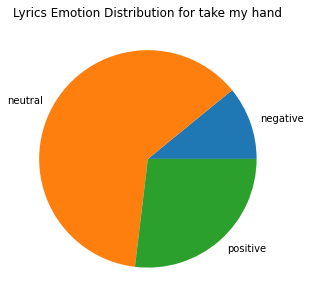

Precious Lord, take my hand. Lead me on, let me stand. I'm tired, I'm weak, I'm lone. Through the storm, through the night. Lead me on to the light. Take my hand precious Lord, lead me home. . When my way grows drear precious Lord linger near. When my light is almost gone. Hear my cry, hear my call. Hold my hand lest I fall. Take my hand precious Lord, lead me home. . When the darkness appears and the night draws near. And the day is past and gone. At the river I stand. Guide my feet, hold my hand. Take my hand precious Lord, lead me home. . Precious Lord, take my hand. Lead me on, let me stand. I'm tired, I'm weak, I'm lone. Through the storm, through the night. Lead me on to the light. Take my hand precious Lord, lead me home


In [181]:
distb = [xx['neg'],xx['neu'],xx['pos']]
leg = ['negative','neutral','positive']
plt.figure(figsize=(5, 5))
plt.pie(distb,labels=leg)
plt.title('Lyrics Emotion Distribution for '+'take my hand')
plt.show()
print(lyrics)